<a href="https://colab.research.google.com/github/ChrisLowry3/Data110/blob/main/Week_10_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 1. Project Title: Analysis of Daily Arrests in Mongomery County

# 2. Purpose of the Project: Select appropriate dataset on Daily Arrests in
#    Montgomery County, import and clean the dataset, perform data analysis,
#    to observe unique findings and reach conclusions.

# 3. Source of the Dataset: dataMontgomerycountymd.gov

# 4. Name of the Dataset: Daily Arrests

In [9]:
# 5. Load libraries:

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
# 6. Import the Dataset:

In [11]:
#df=pd.read_csv('/content/Daily_Arrests_20241001 (1).csv')
df=pd.read_csv('https://raw.githubusercontent.com/adinsa1/DATA205-PROJECT/refs/heads/main/Daily_Arrests_20241001%20(1).csv')

df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


#Task 1

In [16]:
theft_df=df[df['OFFENSE'].str.contains('theft',case=False,na=False)]
theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
13,CLARK,MICHAEL,ALANZOE,40,1300 Block Of new york ave,WASHINGTON,DC,09/20/2024,"THEFT: $100 TO UNDER $1,500"
14,MEJIA POSADA,RENE,ALEXANDER,26,0 Block Of NINA CT,GAITHERSBURG,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
22,ESCOBAR,DEYANIRA,HILARIA,35,400 Block Of COLLEGE PKWY,ROCKVILLE,MD,09/20/2024,"THEFT: $100 TO UNDER $1,500"
30,WEST,MAIA,FRANCESCA,28,9900 Block Of BIG ROCK RD,SILVER SPRING,MD,09/21/2024,"THEFT: $1,500 TO UNDER $25,000"


#Task 2

In [17]:
#Give total Number of theft incidents
theft_count = len(theft_df)
print(f"The total number of theft incidents is: {theft_count}")

The total number of theft incidents is: 96


In [19]:
#Give range of ages in theft incidents
min_age = theft_df['AGE'].min()
max_age = theft_df['AGE'].max()

print(f"The range of ages involved in theft offenses is from {min_age} to {max_age} years old.")

The range of ages involved in theft offenses is from 18 to 67 years old.


#Task 3

In [22]:
df['ARREST DATE']=pd.to_datetime(df['ARREST DATE'])
df['dayOfWeek']=df['ARREST DATE'].dt.dayofweek
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 3 to 472
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LAST NAME    96 non-null     object        
 1   FIRST NAME   96 non-null     object        
 2   MIDDLE NAME  76 non-null     object        
 3   AGE          96 non-null     int64         
 4   STREET       96 non-null     object        
 5   CITY         96 non-null     object        
 6   STATE        96 non-null     object        
 7   ARREST DATE  96 non-null     datetime64[ns]
 8   OFFENSE      96 non-null     object        
 9   dayOfWeek    96 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 9.9+ KB


,AGE,ARREST DATE,dayOfWeek
count,96.000000,96,96.000000
mean,33.114583,2024-09-15 22:00:00,2.322917
min,18.000000,2024-09-01 00:00:00,0.000000
25%,24.750000,2024-09-09 00:00:00,1.000000
50%,28.500000,2024-09-17 12:00:00,2.000000
75%,40.000000,2024-09-24 00:00:00,3.250000
max,67.000000,2024-09-30 00:00:00,6.000000
std,12.169738,NaN,1.826673


In [25]:
#Show highest theft count on which day
day_theft_counts = df.groupby('dayOfWeek')['OFFENSE'].count()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
highest_theft_day = day_theft_counts.idxmax()
print(f"The day of the week with the highest theft count is: {highest_theft_day}") # 0 is Monday, 6 is Sunday

The day of the week with the highest theft count is: 0


Monday Has the most theft incidents as the code produced "0" which is Monday.

#Task 4

In [26]:
#Age group with most theft involvement
age_theft_counts = theft_df['AGE'].value_counts()
most_common_age = age_theft_counts.idxmax()
print(f"The age group with the most theft incidents is: {most_common_age}")

The age group with the most theft incidents is: 26


#Task 5

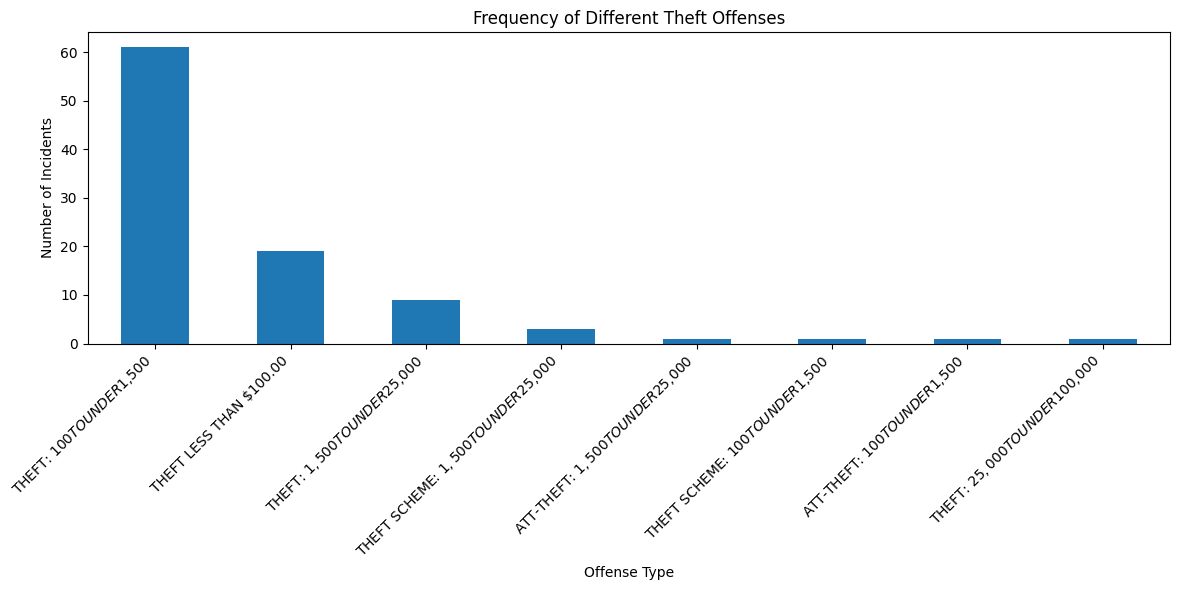

In [28]:
theft_offense_counts = df['OFFENSE'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
theft_offense_counts.plot(kind='bar')
plt.title('Frequency of Different Theft Offenses')
plt.xlabel('Offense Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Theft from $100-$1500 is the most common as you can see in the chart followed by Less than $100.


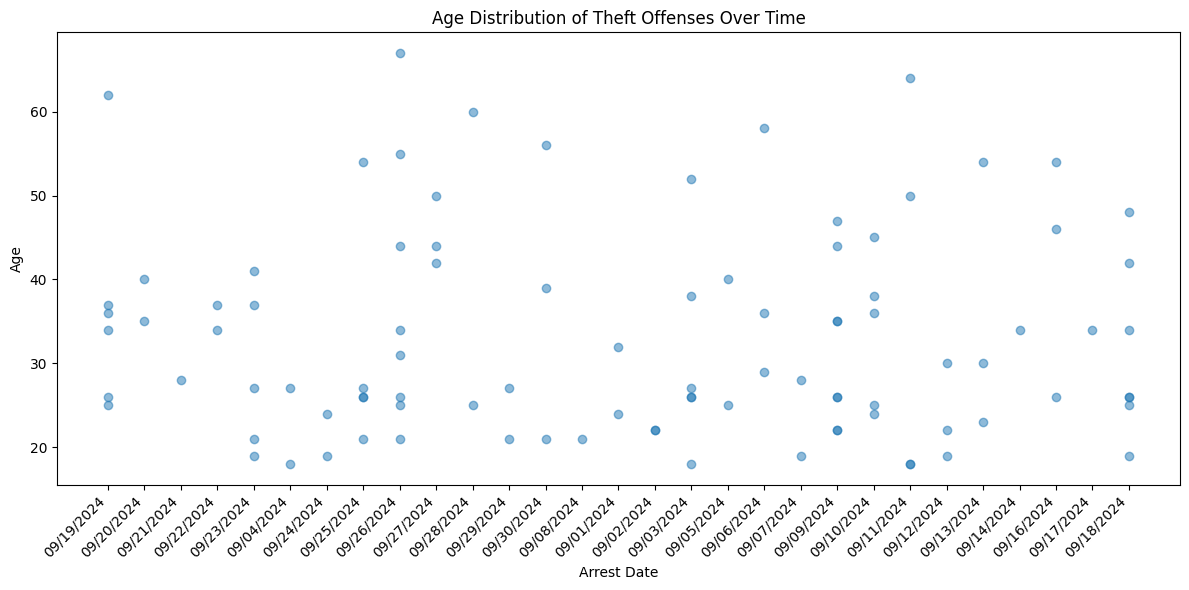

In [32]:
# Create a scatter plot of age vs. arrest date for theft offenses
plt.figure(figsize=(12, 6))
plt.scatter(theft_df['ARREST DATE'], theft_df['AGE'], alpha=0.5)
plt.title('Age Distribution of Theft Offenses Over Time')
plt.xlabel('Arrest Date')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()